<h1>IMPORTING LIBRARIES</h1>

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import pickle

print('All Libraries have been imported')

All Libraries have been imported


<h1>Loading Raw Dataset</h1>

In [2]:
floodDF = pd.read_csv('ml_data.csv')

In [3]:
# Split the data into features (X) and target (y)
X = floodDF.drop(['flooded', 'City Name', 'Province'], axis=1)
y = floodDF['flooded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
y_pred = rf.predict(X_test)
print(y_pred)

['NO' 'YES' 'NO' ... 'YES' 'NO' 'NO']


In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


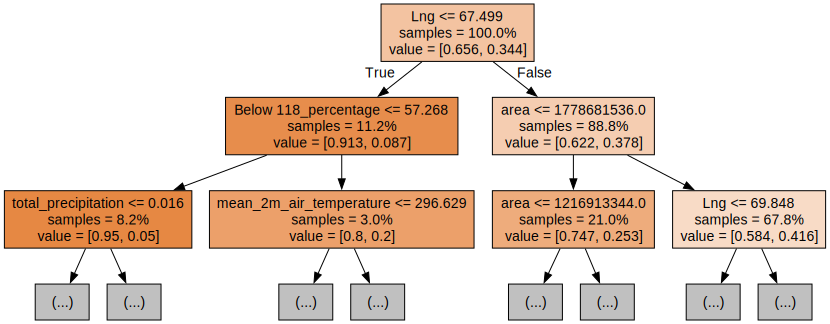

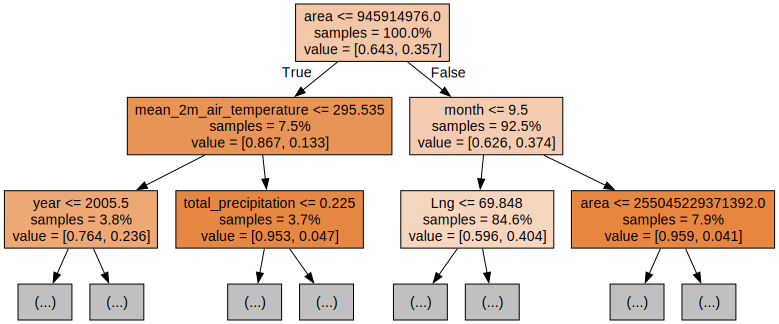

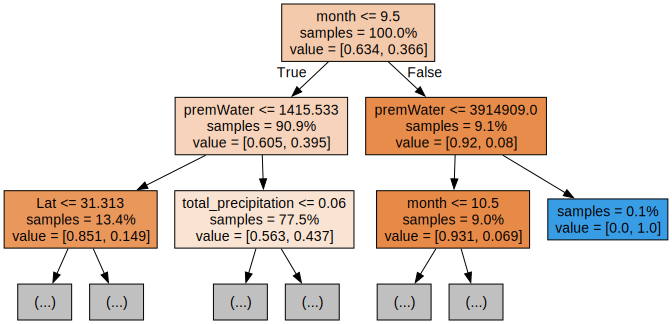

In [8]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [9]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001577A69E6F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000015729858320>})

In [10]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 182}


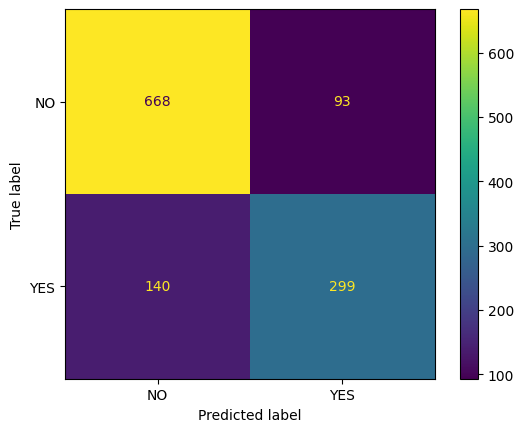

In [11]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_).plot();

In [15]:
y_pred = best_rf.predict(X_test)
print(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)
print(X_test)

377      NO
785     YES
145     YES
2887    YES
3264     NO
       ... 
3670    YES
2694    YES
747     YES
2316     NO
2280     NO
Name: flooded, Length: 1200, dtype: object ['NO' 'YES' 'NO' ... 'NO' 'YES' 'NO']
Accuracy: 0.8058333333333333
      month  year        Lat        Lng  mean_2m_air_temperature  \
377      12  2004  26.751405  67.527545               290.781047   
785       7  2005  32.074425  74.157794               303.890741   
145       6  2003  25.032581  68.456970               305.742665   
2887      8  2013  25.302931  69.164348               303.828048   
3264      6  2015  25.979935  69.305332               307.807716   
...     ...   ...        ...        ...                      ...   
3670      8  2017  32.425642  73.474581               304.015871   
2694      8  2012  33.736877  75.145514               301.131320   
747       6  2005  35.405002  72.114440               285.384996   
2316      6  2010  28.488208  70.456866               308.472568   
2280      

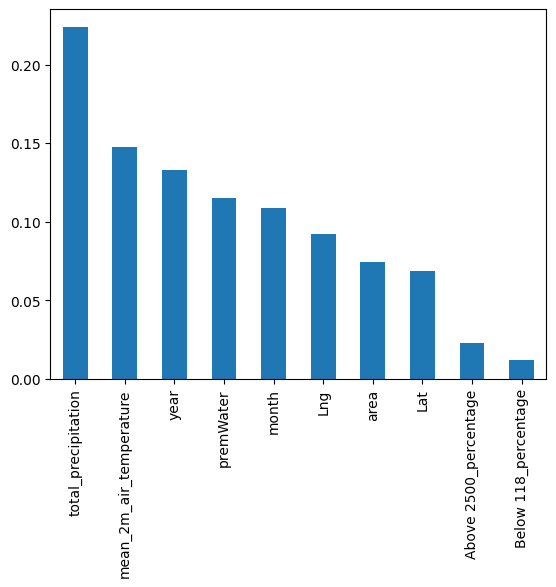

In [13]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [14]:
pickle.dump(best_rf, open('model.pkl', 'wb'))